In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import abi.misc.utils

In [32]:
obs_keys = [
    'relative_offset', 'relative_heading', 'velocity', 'length', 'width',
    'lane_curvature', 'markerdist_left', 'markerdist_right', 'jerk',
    'angular_rate_frenet', 'timegap', 'time_to_collision',
    'is_colliding', 'out_of_lane', 'negative_velocity'
]
nbeams = 20
obs_keys += ['lidar_{}'.format(i) for i in range(1, nbeams+1)]
obs_keys += ['rangerate_lidar_{}'.format(i) for i in range(1, nbeams+1)]
act_keys = ['accel', 'turn_rate_frenet']
data = abi.misc.utils.load_data(
    filepath='../../data/trajectories/ngsim.h5',
    debug_size=None,
    mode='ngsim',
    min_length=30,
    obs_keys=obs_keys,
    act_keys=act_keys,
    load_y=False,
    normalize_data=False
)
obs = data['obs']
act = data['act']
lengths = data['lengths']
obs_keys = data['obs_keys']
act_keys = data['act_keys']
max_len = data['max_len']
obs_dim = data['obs_dim']
act_dim = data['act_dim']
val_obs, val_act, val_lengths, val_y = data['val_obs'], data['val_act'], data['val_lengths'], data['val_y']

In [33]:
len(obs)

8884

In [28]:
ttc_idx = [i for (i,n) in enumerate(obs_keys) if 'time_to_collision' == n]
ttc = []
ttc_thresh = 3.5
for i,l in enumerate(lengths):
    idxs = np.where(obs[i,:l,ttc_idx] < ttc_thresh)[0]
    ttc.append(len(idxs) / l)

(array([  1.91900000e+03,   8.00000000e+00,   2.59000000e+02,
          3.81000000e+02,   7.80000000e+01,   2.38000000e+02,
          2.57000000e+02,   3.03000000e+02,   1.84000000e+02,
          1.55000000e+02,   2.40000000e+02,   1.68000000e+02,
          1.30000000e+02,   1.46000000e+02,   1.08000000e+02,
          1.07000000e+02,   1.01000000e+02,   8.20000000e+01,
          7.70000000e+01,   5.70000000e+01,   7.10000000e+01,
          4.60000000e+01,   3.20000000e+01,   4.90000000e+01,
          2.80000000e+01,   4.50000000e+01,   2.60000000e+01,
          2.50000000e+01,   1.90000000e+01,   9.00000000e+00,
          1.80000000e+01,   1.10000000e+01,   1.30000000e+01,
          1.20000000e+01,   7.00000000e+00,   1.20000000e+01,
          1.00000000e+01,   9.00000000e+00,   1.00000000e+01,
          9.00000000e+00,   9.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
        

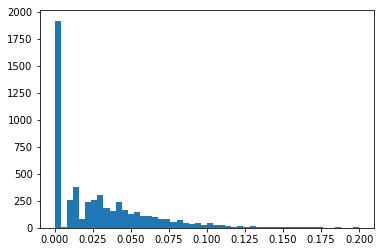

In [29]:
plt.hist(ttc, 50, range=(0,.2))